# 1. 모듈 불러오기

In [1]:
# 그래프 시각화할 때 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (4,301 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [2]:
import gdown
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
# plt.rc('font', family='NanumBarunGothic')

# 2. 데이터 불러오기

In [3]:
id_list = ['1X9zIrgJOSaOr1jkq9-Lf2XOR7JqIgcWE',
            '18h-aSuefrnr3Gks1zvF8kJy1zxrhK_Ut',           
           '1xaXBX9bKdetQvtuzkvAhrCx2v3yqjQZM',
           '132z4ZCWHTevY210vscGZ4xkEkRbnvVWe',
           '1YXNRJm0PrhveF7K-C1_5_7LXT3X2Ecjx',
           '1CzfobrUbbQo1pfcv2W0Q6jTb700zZYE4',
           '1BarDeddgrSEYEx6BHv1NjI8EVVsUuyJc',
           '1_JPOLF2YocdTET59r01nq43ZgUUONQxE']

for i in id_list:
  id = 'https://drive.google.com/uc?id=' + i
  gdown.download(id)

Downloading...
From: https://drive.google.com/uc?id=1X9zIrgJOSaOr1jkq9-Lf2XOR7JqIgcWE
To: /content/preprocessed_download.csv
100%|██████████| 24.3M/24.3M [00:00<00:00, 172MB/s]
Downloading...
From: https://drive.google.com/uc?id=18h-aSuefrnr3Gks1zvF8kJy1zxrhK_Ut
To: /content/preprocessed_interest_pricing.csv
100%|██████████| 24.3M/24.3M [00:00<00:00, 75.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xaXBX9bKdetQvtuzkvAhrCx2v3yqjQZM
To: /content/preprocessed_sfx.csv
100%|██████████| 131k/131k [00:00<00:00, 93.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=132z4ZCWHTevY210vscGZ4xkEkRbnvVWe
To: /content/preprocessed_song.csv
100%|██████████| 325k/325k [00:00<00:00, 84.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1YXNRJm0PrhveF7K-C1_5_7LXT3X2Ecjx
To: /content/preprocessed_tag.csv
100%|██████████| 7.32M/7.32M [00:00<00:00, 49.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CzfobrUbbQo1pfcv2W0Q6jTb700zZYE4
To: /content/preprocessed_unsubscri

In [4]:
file_list = ['download', 'interest_pricing', 'sfx',
             'song', 'tag', 'unsubscribe_request',
             'user', 'visit']
df_list = []

for i in file_list:
  file_name = "/content/preprocessed_" + i + ".csv"
  globals()["df_{}".format(i)] = pd.read_csv(file_name)
  df_list.append(file_name)

In [5]:
# 데이터 살펴보기
display(df_sfx.head())
print('\n')

# 데이터 자료형 확인
display([df_sfx.info()])
print('\n')

# 데이터 통계 요약 정보 확인
display(df_sfx.describe())

,id,is_free,download_count,play_count,is_visible,grade,playtime(sec),uploaded_at
0,1,1,122,1901,1,2.3.F,14,2018-12-21
1,2,1,34,951,1,2.3.F,2,2018-12-21
2,3,1,27,588,1,2.3.F,86,2018-12-21
3,4,1,40,634,1,2.3.F,21,2018-12-21
4,5,1,34,517,1,2.3.F,20,2018-12-21




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              3652 non-null   int64 
 1   is_free         3652 non-null   int64 
 2   download_count  3652 non-null   int64 
 3   play_count      3652 non-null   int64 
 4   is_visible      3652 non-null   int64 
 5   grade           3652 non-null   object
 6   playtime(sec)   3652 non-null   int64 
 7   uploaded_at     3652 non-null   object
dtypes: int64(6), object(2)
memory usage: 228.4+ KB


[None]

,id,is_free,download_count,play_count,is_visible,playtime(sec)
count,3652.00000,3652.000000,3652.000000,3652.000000,3652.0,3652.000000
mean,2068.13828,0.468510,60.011501,853.124042,1.0,7.177163
std,1259.48065,0.499076,224.732887,1859.566357,0.0,41.918438
min,1.00000,0.000000,0.000000,10.000000,1.0,0.000000
25%,914.75000,0.000000,7.000000,210.000000,1.0,2.000000
50%,2130.50000,0.000000,17.000000,412.000000,1.0,3.000000
75%,3219.25000,1.000000,44.000000,771.250000,1.0,7.000000
max,4170.00000,1.000000,6106.000000,33288.000000,1.0,2439.000000


In [6]:
df_sfx = df_sfx.set_index(['id'])

#클러스터링  song으로

In [7]:
df_song.drop(['Unnamed: 0'], axis = 1, inplace = True)
# df_song.set_index(['id'], inplace = True)
df_song.head()

,id,is_free,download_count,play_count,downloaded_at,is_visible,grade,bpm,length(sec)
0,2,True,6,49,2018-05-12,False,1.3.F,116.0,227
1,3,True,3,110,2018-05-12,False,1.3.F,175.0,244
2,4,True,1,52,2018-05-12,False,1.3.F,160.0,347
3,5,True,1,32,2018-05-12,False,1.3.F,116.0,230
4,6,True,2,22,2018-05-12,False,1.3.F,173.0,318


In [8]:
df_song.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6133 entries, 0 to 6132
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              6133 non-null   int64  
 1   is_free         6133 non-null   bool   
 2   download_count  6133 non-null   int64  
 3   play_count      6133 non-null   int64  
 4   downloaded_at   6133 non-null   object 
 5   is_visible      6133 non-null   bool   
 6   grade           6133 non-null   object 
 7   bpm             6133 non-null   float64
 8   length(sec)     6133 non-null   int64  
dtypes: bool(2), float64(1), int64(4), object(2)
memory usage: 347.5+ KB


In [9]:
df_song["is_free"] = df_song["is_free"].astype(int)
df_song["is_visible"] = df_song["is_visible"].astype(int)
df_song["bpm"] = df_song["bpm"].astype(int)

In [10]:
df_song

,id,is_free,download_count,play_count,downloaded_at,is_visible,grade,bpm,length(sec)
0,2,1,6,49,2018-05-12,0,1.3.F,116,227
1,3,1,3,110,2018-05-12,0,1.3.F,175,244
2,4,1,1,52,2018-05-12,0,1.3.F,160,347
3,5,1,1,32,2018-05-12,0,1.3.F,116,230
4,6,1,2,22,2018-05-12,0,1.3.F,173,318
...,...,...,...,...,...,...,...,...,...
6128,9462,0,4,20,2022-10-11,1,1.1.A,150,125
6129,9463,0,0,0,2022-10-11,1,1.1.A,110,284
6130,9464,0,1,13,2022-10-11,1,1.1.A,110,142
6131,9465,0,0,0,2022-10-11,1,1.1.A,128,242


In [11]:
cs = df_song[['id','is_free', 'download_count', 'play_count', 'is_visible', 'bpm','length(sec)' ]]
cs.head()

,id,is_free,download_count,play_count,is_visible,bpm,length(sec)
0,2,1,6,49,0,116,227
1,3,1,3,110,0,175,244
2,4,1,1,52,0,160,347
3,5,1,1,32,0,116,230
4,6,1,2,22,0,173,318


In [12]:
cs.columns

Index(['id', 'is_free', 'download_count', 'play_count', 'is_visible', 'bpm',
       'length(sec)'],
      dtype='object')

In [13]:
# 2차원으로 축소
from sklearn.preprocessing import StandardScaler
cs_scaler=StandardScaler()
cs_scaler.fit(cs.iloc[:,1:6])
data=cs_scaler.transform(cs.iloc[:,1:6])

from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(data)
data_pca=pca.transform(data)
data_pca = pd.DataFrame(data_pca, columns = ['PC1', 'PC2'])
data_pca

,PC1,PC2
0,-1.305515,1.191934
1,-1.147420,1.239135
2,-1.228331,1.197048
3,-1.342677,1.163713
4,-1.211085,1.195328
...,...,...
6128,0.472706,-1.123991
6129,0.346210,-1.171713
6130,0.359496,-1.161865
6131,0.387999,-1.161659


In [14]:
data_pca

,PC1,PC2
0,-1.305515,1.191934
1,-1.147420,1.239135
2,-1.228331,1.197048
3,-1.342677,1.163713
4,-1.211085,1.195328
...,...,...
6128,0.472706,-1.123991
6129,0.346210,-1.171713
6130,0.359496,-1.161865
6131,0.387999,-1.161659


In [15]:
# # import matplotlib.pyplot as plt

# plt.scatter(data_pca[:,0],data_pca[:,1])
# plt.show()

In [16]:
# KMeans 라이브러리를 불러오기
from sklearn.cluster import KMeans
sum_of_squared_distance = []
# 9개만 구해본다.
K = range(1,10)
# 1부터 9까지의 for문 반복을 통해 각 Kmeans의 군집을 몇개까지 하면 될지 측정
for k in K:
  km = KMeans(n_clusters = k)
  km = km.fit(data_pca)
  sum_of_squared_distance.append(km.inertia_)
# inertia_함수를 이용해 군집간 거리가 최소가 되는 k를 누적하여 파악한다.


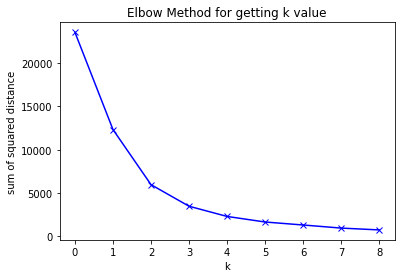

In [17]:
# 군집의 개수를 정하기 위해(군집의 중심이 될 점 centroid의 개수를 정하기)
plt.plot(sum_of_squared_distance, '-bx')
plt.xlabel('k')
plt.ylabel('sum of squared distance')  
plt.title('Elbow Method for getting k value') 
plt.show()
# 완만해지기 전까지가 유의미한 데이터들, 결과 k에 3을 넣어보자

In [18]:
kmeans = KMeans(n_clusters =3, random_state=50)
kmeans.fit(data_pca)
label_kmc = kmeans.labels_
label_kmc = pd.Series(label_kmc)
data_pca['label_kmc'] = label_kmc.values
data_pca

,PC1,PC2,label_kmc
0,-1.305515,1.191934,1
1,-1.147420,1.239135,1
2,-1.228331,1.197048,1
3,-1.342677,1.163713,1
4,-1.211085,1.195328,1
...,...,...,...
6128,0.472706,-1.123991,0
6129,0.346210,-1.171713,0
6130,0.359496,-1.161865,0
6131,0.387999,-1.161659,0


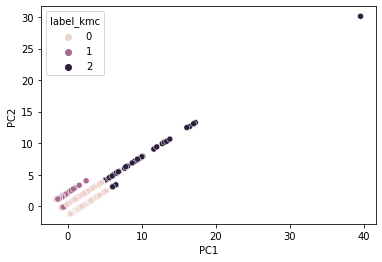

In [19]:
import seaborn as sns
# 구한 k 값을 바탕으로 K-Means진행하기
sns.scatterplot(data = data_pca, x = 'PC1', y = 'PC2', hue = 'label_kmc');

##범주형 데이터처리

In [20]:
df_user

,Unnamed: 0,id,sign_in_count,last_login_at,user_type,joined_at,favorite_genre
0,0,1,7201,2022-10-12,unknown,2018-05-11,"[""vlog""]"
1,1,12,49,2021-10-08,individual,2018-05-30,[]
2,2,29,23,2022-07-27,student,2018-08-02,[]
3,3,30,241,2022-08-24,unknown,2018-08-06,[]
4,4,31,0,2018-08-07,unknown,2018-08-07,[]
...,...,...,...,...,...,...,...
102789,102789,118123,1,2022-10-12,individual,2022-10-12,[]
102790,102790,118124,1,2022-10-12,unknown,2022-10-12,[]
102791,102791,118125,1,2022-10-12,corporate,2022-10-12,[]
102792,102792,118126,1,2022-10-12,individual,2022-10-12,[]


In [21]:

# 특수문자 제거

df_user['favorite_genre']= df_user['favorite_genre'].str.replace(pat=r'[^\w]',repl=r'',regex=True)

In [22]:
df_user

,Unnamed: 0,id,sign_in_count,last_login_at,user_type,joined_at,favorite_genre
0,0,1,7201,2022-10-12,unknown,2018-05-11,vlog
1,1,12,49,2021-10-08,individual,2018-05-30,
2,2,29,23,2022-07-27,student,2018-08-02,
3,3,30,241,2022-08-24,unknown,2018-08-06,
4,4,31,0,2018-08-07,unknown,2018-08-07,
...,...,...,...,...,...,...,...
102789,102789,118123,1,2022-10-12,individual,2022-10-12,
102790,102790,118124,1,2022-10-12,unknown,2022-10-12,
102791,102791,118125,1,2022-10-12,corporate,2022-10-12,
102792,102792,118126,1,2022-10-12,individual,2022-10-12,


In [23]:
df_user['favorite_genre'].value_counts()

                                              83789
vlog                                           5618
game                                           3946
story                                          2283
talk                                            971
                                              ...  
gametalkstoryeatingreviewbeautypetkidsvlog        1
vlogeatingstorygamereview                         1
storydronereviewbeautykids                        1
gamestoryeatingreview                             1
revieweatinggamevlogstorypet                      1
Name: favorite_genre, Length: 914, dtype: int64

In [24]:
# df_user['vlog'] = df_user['favorite_genre'].str.contains('vlog', na=False)
# df_user

In [25]:
# 장르들을 리스트에 담기
items = ['kids', 'vlog', 'story', 'beauty', 'review', 'talk', 'game', 'pet', 'eating', 'drone']

In [26]:
# favorite_genre 칼럼 만들기
for i in items:
  df_user[i] = df_user['favorite_genre'].str.contains(i, na=False)

In [27]:
df_user.loc[50001]

Unnamed: 0                     50001
id                             61865
sign_in_count                      3
last_login_at             2021-05-03
user_type                    unknown
joined_at                 2021-05-03
favorite_genre    vlogeatinggametalk
kids                           False
vlog                            True
story                          False
beauty                         False
review                         False
talk                            True
game                            True
pet                            False
eating                          True
drone                          False
Name: 50001, dtype: object

In [28]:
df_user

,Unnamed: 0,id,sign_in_count,last_login_at,user_type,joined_at,favorite_genre,kids,vlog,story,beauty,review,talk,game,pet,eating,drone
0,0,1,7201,2022-10-12,unknown,2018-05-11,vlog,False,True,False,False,False,False,False,False,False,False
1,1,12,49,2021-10-08,individual,2018-05-30,,False,False,False,False,False,False,False,False,False,False
2,2,29,23,2022-07-27,student,2018-08-02,,False,False,False,False,False,False,False,False,False,False
3,3,30,241,2022-08-24,unknown,2018-08-06,,False,False,False,False,False,False,False,False,False,False
4,4,31,0,2018-08-07,unknown,2018-08-07,,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102789,102789,118123,1,2022-10-12,individual,2022-10-12,,False,False,False,False,False,False,False,False,False,False
102790,102790,118124,1,2022-10-12,unknown,2022-10-12,,False,False,False,False,False,False,False,False,False,False
102791,102791,118125,1,2022-10-12,corporate,2022-10-12,,False,False,False,False,False,False,False,False,False,False
102792,102792,118126,1,2022-10-12,individual,2022-10-12,,False,False,False,False,False,False,False,False,False,False


In [29]:
for i in items:
  df_user[i] = df_user[i].astype(int)

In [30]:
df_user

,Unnamed: 0,id,sign_in_count,last_login_at,user_type,joined_at,favorite_genre,kids,vlog,story,beauty,review,talk,game,pet,eating,drone
0,0,1,7201,2022-10-12,unknown,2018-05-11,vlog,0,1,0,0,0,0,0,0,0,0
1,1,12,49,2021-10-08,individual,2018-05-30,,0,0,0,0,0,0,0,0,0,0
2,2,29,23,2022-07-27,student,2018-08-02,,0,0,0,0,0,0,0,0,0,0
3,3,30,241,2022-08-24,unknown,2018-08-06,,0,0,0,0,0,0,0,0,0,0
4,4,31,0,2018-08-07,unknown,2018-08-07,,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102789,102789,118123,1,2022-10-12,individual,2022-10-12,,0,0,0,0,0,0,0,0,0,0
102790,102790,118124,1,2022-10-12,unknown,2022-10-12,,0,0,0,0,0,0,0,0,0,0
102791,102791,118125,1,2022-10-12,corporate,2022-10-12,,0,0,0,0,0,0,0,0,0,0
102792,102792,118126,1,2022-10-12,individual,2022-10-12,,0,0,0,0,0,0,0,0,0,0


In [31]:
df_genre = df_user[['id', 'kids', 'vlog', 'story', 'beauty', 'review', 'talk', 'game', 'pet', 'eating', 'drone']]
df_genre.rename(columns={'id':'user_id'}, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [32]:
df_genre

,user_id,kids,vlog,story,beauty,review,talk,game,pet,eating,drone
0,1,0,1,0,0,0,0,0,0,0,0
1,12,0,0,0,0,0,0,0,0,0,0
2,29,0,0,0,0,0,0,0,0,0,0
3,30,0,0,0,0,0,0,0,0,0,0
4,31,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
102789,118123,0,0,0,0,0,0,0,0,0,0
102790,118124,0,0,0,0,0,0,0,0,0,0
102791,118125,0,0,0,0,0,0,0,0,0,0
102792,118126,0,0,0,0,0,0,0,0,0,0


In [33]:
# csv 파일로 저장
df_genre.to_csv('df_genre.csv')

# 딕셔너리를 이용한 워드클라우드

In [34]:
from wordcloud import WordCloud 

In [35]:
# favorite_genre 각 합계
df_genre.sum().sort_values(ascending = False)

user_id    6537646702
vlog             9216
game             6141
story            4158
talk             3211
review           1312
kids             1198
eating            809
beauty            787
pet               693
drone             341
dtype: int64

In [36]:
words_dic = {
    'vlog' : 9216,
    'game' : 6141,
    'story' : 4158,
    'talk' : 3211,
    'review' : 1312,
    'kids' : 1198,
    'eating' : 809,
    'beauty' : 787,
    'pet' : 693,
    'drone' : 341
        }
words_dic

{'vlog': 9216,
 'game': 6141,
 'story': 4158,
 'talk': 3211,
 'review': 1312,
 'kids': 1198,
 'eating': 809,
 'beauty': 787,
 'pet': 693,
 'drone': 341}

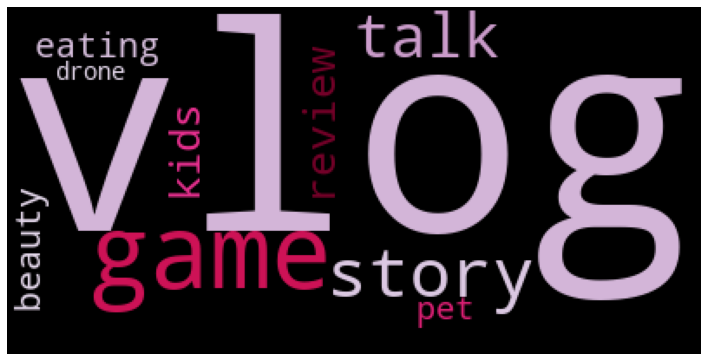

In [37]:
# dictionary 사용 #1
wc3 = WordCloud(max_font_size=200,
                background_color='black',
                colormap='PuRd').generate_from_frequencies(words_dic)

plt.figure(figsize=(10, 8))
plt.imshow(wc3)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

In [38]:
# favorite_genre를 워드클라우드 시각화한 것을 => png파일로 저장
wc3.to_file('favorite_genre2.png')

In [39]:
plt.rc('font', family='NanumBarunGothic')

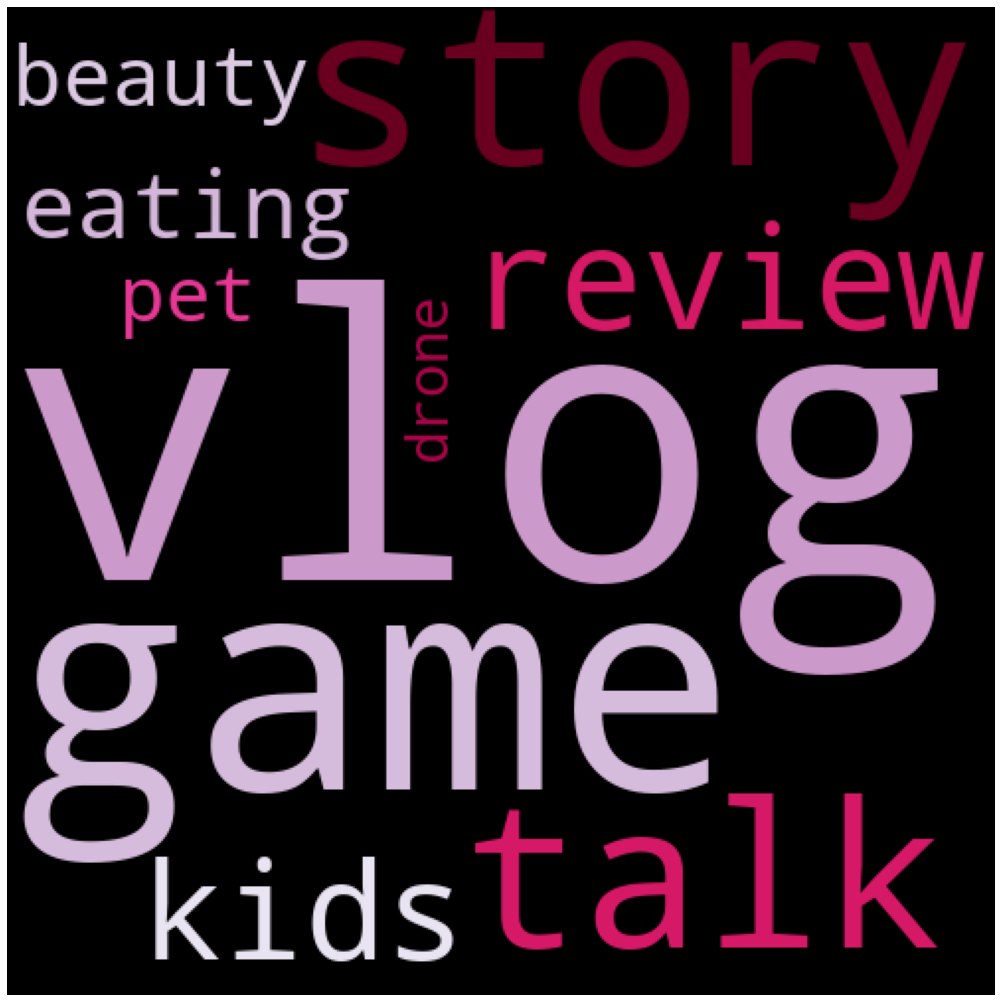

In [40]:
wc4 = WordCloud(
    background_color="black", 
    colormap='PuRd',
    width=500, 
    height=500,
    max_font_size=200).generate_from_frequencies(words_dic)

plt.figure(figsize=(18, 14))
plt.imshow(wc4)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

#Final_data 클러스터링(Kmeans, DBSCAN)


In [71]:
# 총 유저_final_data 클러스터링
final = pd.read_csv('/content/final_data.csv')
final

,Unnamed: 0,user_id,period_sub,total_fee,refund,personal,smallBiz,middleBiz,bigBiz,sign_in_count,...,talk,game,pet,eating,drone,corporate,freelancer,individual,student,unknown
0,0,161,516 days,158500.0,0.0,18,0,0,0,67.0,...,0,0,1,0,0,0,0,0,0,1
1,1,256,149 days,39700.0,0.0,5,0,0,0,9.0,...,0,0,0,0,0,0,0,0,0,1
2,2,592,7 days,0.0,0.0,1,0,0,0,15.0,...,0,0,0,0,0,1,0,0,0,0
3,3,621,14 days,0.0,0.0,1,0,0,0,46.0,...,0,0,1,0,0,0,0,0,0,1
4,4,1227,355 days,109000.0,0.0,12,0,0,0,9.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8370,8370,118062,7 days,0.0,0.0,1,0,0,0,1.0,...,0,0,0,0,0,0,0,0,1,0
8371,8371,118078,365 days,118800.0,0.0,1,0,0,0,2.0,...,0,0,0,0,0,0,0,1,0,0
8372,8372,118082,7 days,0.0,0.0,0,1,0,0,1.0,...,0,0,0,0,0,1,0,0,0,0
8373,8373,118102,7 days,0.0,0.0,1,0,0,0,1.0,...,0,0,0,0,0,0,0,1,0,0


In [72]:
df_test = df_user[['id', 'user_type']]
df_test.rename(columns={'id':'user_id'}, inplace = True)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [73]:
df_final2 = final.copy()

In [74]:
final_test = pd.merge(df_final2, df_test, how='left', left_on='user_id', right_on='user_id')
final_test = final_test.drop(columns=['corporate',	'freelancer',	'individual',	'student', 'unknown'], axis=1)

In [75]:
final_test.isnull().sum()

Unnamed: 0       0
user_id          0
period_sub       0
total_fee        0
refund           0
personal         0
smallBiz         0
middleBiz        0
bigBiz           0
sign_in_count    0
period_use       0
sfx_free         0
sfx_peid         0
song_free        0
song_peid        0
etc              0
kids             0
vlog             0
story            0
beauty           0
review           0
talk             0
game             0
pet              0
eating           0
drone            0
user_type        0
dtype: int64

In [76]:
import numpy as np
column_names=['user_type']
for i in column_names:
  temp_list=final_test[i].unique()
  final_test[i]=final_test[i].apply(lambda x: np.where(temp_list==x)[0][0])

final_test

,Unnamed: 0,user_id,period_sub,total_fee,refund,personal,smallBiz,middleBiz,bigBiz,sign_in_count,...,vlog,story,beauty,review,talk,game,pet,eating,drone,user_type
0,0,161,516 days,158500.0,0.0,18,0,0,0,67.0,...,0,0,0,0,0,0,1,0,0,0
1,1,256,149 days,39700.0,0.0,5,0,0,0,9.0,...,0,0,0,0,0,0,0,0,0,0
2,2,592,7 days,0.0,0.0,1,0,0,0,15.0,...,1,1,0,0,0,0,0,0,0,1
3,3,621,14 days,0.0,0.0,1,0,0,0,46.0,...,1,0,0,0,0,0,1,0,0,0
4,4,1227,355 days,109000.0,0.0,12,0,0,0,9.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8370,8370,118062,7 days,0.0,0.0,1,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,3
8371,8371,118078,365 days,118800.0,0.0,1,0,0,0,2.0,...,0,0,0,0,0,0,0,0,0,2
8372,8372,118082,7 days,0.0,0.0,0,1,0,0,1.0,...,0,0,0,0,0,0,0,0,0,1
8373,8373,118102,7 days,0.0,0.0,1,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,2


In [77]:
final_test['period_sub'] = final_test['period_sub'].str.split(' ').str[0]
final_test = final_test.astype({'period_sub':'int'})
final_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8375 entries, 0 to 8374
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     8375 non-null   int64  
 1   user_id        8375 non-null   int64  
 2   period_sub     8375 non-null   int64  
 3   total_fee      8375 non-null   float64
 4   refund         8375 non-null   float64
 5   personal       8375 non-null   int64  
 6   smallBiz       8375 non-null   int64  
 7   middleBiz      8375 non-null   int64  
 8   bigBiz         8375 non-null   int64  
 9   sign_in_count  8375 non-null   float64
 10  period_use     8375 non-null   object 
 11  sfx_free       8375 non-null   float64
 12  sfx_peid       8375 non-null   float64
 13  song_free      8375 non-null   float64
 14  song_peid      8375 non-null   float64
 15  etc            8375 non-null   float64
 16  kids           8375 non-null   int64  
 17  vlog           8375 non-null   int64  
 18  story   

In [79]:
# final_test['period_use'].head(1)
final_test['period_use'] = final_test['period_use'].str.split(' ').str[0]
final_test = final_test.astype({'period_use':'int'})

In [80]:
# 2차원으로 축소
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
std_scaler.fit(final_test.iloc[:,1:27])
data=std_scaler.transform(final_test.iloc[:,1:27])

from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(data)
test_pca=pca.transform(data)
test_pca.shape

(8375, 2)

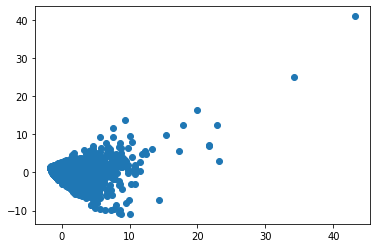

In [81]:
import matplotlib.pyplot as plt

plt.scatter(test_pca[:,0],test_pca[:,1])
plt.show()

In [82]:
test_pca2 = pd.DataFrame(test_pca, columns = ['x','y'])
test_pca2[test_pca2['x'] >= 20]
test_pca2 = test_pca2.drop([6277, 361, 1223, 1244, 3993, 4602])

In [83]:
test_pca_cc = pd.concat([final_test, test_pca2], axis = 1)


In [84]:
test_pca_cc[test_pca_cc['x'] >= 20]

,Unnamed: 0,user_id,period_sub,total_fee,refund,personal,smallBiz,middleBiz,bigBiz,sign_in_count,...,beauty,review,talk,game,pet,eating,drone,user_type,x,y


In [85]:
test_pca_cc = test_pca_cc.drop([6277, 361, 1223, 1244, 3993, 4602])

In [86]:
test_pca_cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8369 entries, 0 to 8374
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     8369 non-null   int64  
 1   user_id        8369 non-null   int64  
 2   period_sub     8369 non-null   int64  
 3   total_fee      8369 non-null   float64
 4   refund         8369 non-null   float64
 5   personal       8369 non-null   int64  
 6   smallBiz       8369 non-null   int64  
 7   middleBiz      8369 non-null   int64  
 8   bigBiz         8369 non-null   int64  
 9   sign_in_count  8369 non-null   float64
 10  period_use     8369 non-null   int64  
 11  sfx_free       8369 non-null   float64
 12  sfx_peid       8369 non-null   float64
 13  song_free      8369 non-null   float64
 14  song_peid      8369 non-null   float64
 15  etc            8369 non-null   float64
 16  kids           8369 non-null   int64  
 17  vlog           8369 non-null   int64  
 18  story   

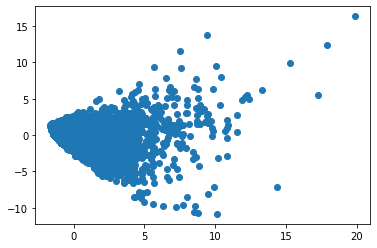

In [87]:
import matplotlib.pyplot as plt

plt.scatter(test_pca_cc['x'],test_pca_cc['y'])
plt.show()

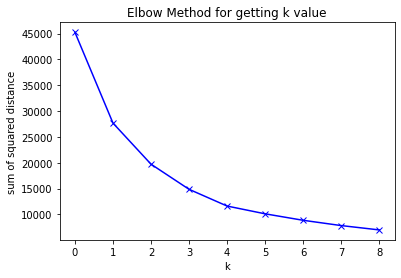

In [88]:
# KMeans 라이브러리를 불러오기
from sklearn.cluster import KMeans
sum_of_squared_distance = []
# 9개만 구해본다.
K = range(1,10)
# 1부터 9까지의 for문 반복을 통해 각 Kmeans의 군집을 몇개까지 하면 될지 측정
for k in K:
  km = KMeans(n_clusters = k)
  km = km.fit(test_pca2)
  sum_of_squared_distance.append(km.inertia_)
# inertia_함수를 이용해 군집간 거리가 최소가 되는 k를 누적하여 파악한다.

# 군집의 개수를 정하기 위해(군집의 중심이 될 점 centroid의 개수를 정하기)
plt.plot(sum_of_squared_distance, '-bx')
plt.xlabel('k')
plt.ylabel('sum of squared distance')  
plt.title('Elbow Method for getting k value') 
plt.show()
# 완만해지기 전까지가 유의미한 데이터들, 결과 k에 3을 넣어보자


In [89]:
kmeans = KMeans(n_clusters =2, random_state=50)
kmeans.fit(test_pca2)
label_kmc = kmeans.labels_
label_kmc = pd.Series(label_kmc)
test_pca2['label_kmc'] = label_kmc.values
test_pca_cc['kmc_cluster'] = label_kmc.values
test_pca2

,x,y,label_kmc
0,4.590270,-1.867553,1
1,0.356236,-0.983648,0
2,5.747795,1.570284,1
3,3.753704,-1.600175,1
4,1.329837,-1.049337,1
...,...,...,...
8370,-1.459616,1.393205,0
8371,-0.486422,1.154446,0
8372,-1.329803,1.042000,0
8373,-1.629478,0.941473,0


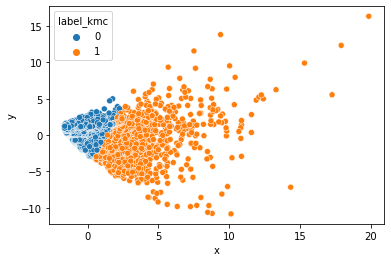

In [90]:
import seaborn as sns
# 구한 k 값을 바탕으로 K-Means진행하기
sns.scatterplot(data = test_pca2, x = 'x', y = 'y', hue = 'label_kmc');

In [91]:
# # DB scan(밀도 기반으로 클러스터링)
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps = 0.2, min_samples =2)

# 시각화를 위한 데이터프레임 생성
test_pca_cc['cluster'] = dbs.fit_predict(test_pca2)

test_pca_cc

,Unnamed: 0,user_id,period_sub,total_fee,refund,personal,smallBiz,middleBiz,bigBiz,sign_in_count,...,talk,game,pet,eating,drone,user_type,x,y,kmc_cluster,cluster
0,0,161,516,158500.0,0.0,18,0,0,0,67.0,...,0,0,1,0,0,0,4.590270,-1.867553,1,0
1,1,256,149,39700.0,0.0,5,0,0,0,9.0,...,0,0,0,0,0,0,0.356236,-0.983648,0,1
2,2,592,7,0.0,0.0,1,0,0,0,15.0,...,0,0,0,0,0,1,5.747795,1.570284,1,2
3,3,621,14,0.0,0.0,1,0,0,0,46.0,...,0,0,1,0,0,0,3.753704,-1.600175,1,3
4,4,1227,355,109000.0,0.0,12,0,0,0,9.0,...,0,0,0,0,0,0,1.329837,-1.049337,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8370,8370,118062,7,0.0,0.0,1,0,0,0,1.0,...,0,0,0,0,0,3,-1.459616,1.393205,0,1
8371,8371,118078,365,118800.0,0.0,1,0,0,0,2.0,...,0,0,0,0,0,2,-0.486422,1.154446,0,1
8372,8372,118082,7,0.0,0.0,0,1,0,0,1.0,...,0,0,0,0,0,1,-1.329803,1.042000,0,1
8373,8373,118102,7,0.0,0.0,1,0,0,0,1.0,...,0,0,0,0,0,2,-1.629478,0.941473,0,1


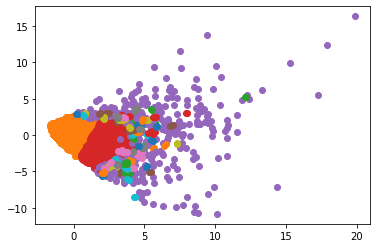

In [92]:
for i in test_pca_cc['cluster'].unique():
  data=test_pca_cc[test_pca_cc['cluster']==i]
  plt.scatter(data['x'],data['y'])
plt.show()

In [93]:
test_pca

array([[ 4.59027012, -1.86755275],
       [ 0.35623555, -0.98364811],
       [ 5.74779479,  1.57028422],
       ...,
       [-1.32980281,  1.04200022],
       [-1.62947754,  0.94147274],
       [-1.6258895 ,  1.21749822]])

In [94]:
final_test2 = final_test.drop(columns = ['kids', 'vlog',	'story',	'beauty',	'review',	'talk',	'game',	'pet',	'eating',	'drone'])
final_test3 = final_test.drop(columns = ['total_fee'])

In [95]:
final_test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8375 entries, 0 to 8374
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     8375 non-null   int64  
 1   user_id        8375 non-null   int64  
 2   period_sub     8375 non-null   int64  
 3   total_fee      8375 non-null   float64
 4   refund         8375 non-null   float64
 5   personal       8375 non-null   int64  
 6   smallBiz       8375 non-null   int64  
 7   middleBiz      8375 non-null   int64  
 8   bigBiz         8375 non-null   int64  
 9   sign_in_count  8375 non-null   float64
 10  period_use     8375 non-null   int64  
 11  sfx_free       8375 non-null   float64
 12  sfx_peid       8375 non-null   float64
 13  song_free      8375 non-null   float64
 14  song_peid      8375 non-null   float64
 15  etc            8375 non-null   float64
 16  user_type      8375 non-null   int64  
dtypes: float64(8), int64(9)
memory usage: 1.2 MB


In [96]:
# 2차원으로 축소
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
std_scaler.fit(final_test2.iloc[:,1:15])
data=std_scaler.transform(final_test2.iloc[:,1:15])

from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(data)
test2_pca=pca.transform(data)
test2_pca.shape

(8375, 2)

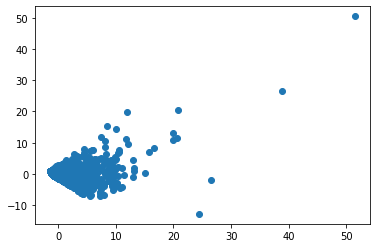

In [97]:
import matplotlib.pyplot as plt

plt.scatter(test2_pca[:,0],test2_pca[:,1])
plt.show()

In [98]:
final['period_sub'] = final.period_sub.str.split(' ').str[0]
final['period_use'] = final.period_sub.str.split(' ').str[0]

In [99]:
del final['Unnamed: 0']

In [100]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8375 entries, 0 to 8374
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        8375 non-null   int64  
 1   period_sub     8375 non-null   object 
 2   total_fee      8375 non-null   float64
 3   refund         8375 non-null   float64
 4   personal       8375 non-null   int64  
 5   smallBiz       8375 non-null   int64  
 6   middleBiz      8375 non-null   int64  
 7   bigBiz         8375 non-null   int64  
 8   sign_in_count  8375 non-null   float64
 9   period_use     8375 non-null   object 
 10  sfx_free       8375 non-null   float64
 11  sfx_peid       8375 non-null   float64
 12  song_free      8375 non-null   float64
 13  song_peid      8375 non-null   float64
 14  etc            8375 non-null   float64
 15  kids           8375 non-null   int64  
 16  vlog           8375 non-null   int64  
 17  story          8375 non-null   int64  
 18  beauty  

In [101]:
final["period_sub"] = final["period_sub"].astype(int)
final["period_use"] = final["period_use"].astype(int)